In [11]:
!pip install pydotplus


In [ ]:
###-----------------
### Import Libraries
###-----------------
import sys


sys.path.append('../')

import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import tensorflow as tf


from utils.helper import fn_plot_torch_hist, fn_plot_confusion_matrix


In [13]:
import warnings
warnings.filterwarnings('ignore')

## Introduction to tensorFlow fifa dataset
- multi class
- reLU
- swish


In [14]:
# Global variables
inpDir = '../input' # Input Stored here
outDir = '../ouput' # output Here
modelDir = './models'# to save Models
subDir = 'fifa_2019' # sub dir by dataset
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)
#rng = np.random.default_rng(seed = RANDOM_STATE)
#N_SAMPLE = 1000
TEST_SIZE = 3811 # 18147 - 56*256
ALPHA = 0.001 # learning rate
NOISE = 0.2 # Error
EPOCHS = 4000
BATCH_SIZE = 256

In [15]:
#set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize':(15,4),
    'axes.labelsize':'medium',
    'axes.titlesize':'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize':'medium',
    #'text.usetex':True,
}
plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


In [16]:
data_df = pd.read_csv(os.path.join(inpDir,'fifa_2019.csv'))

In [17]:
data_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [19]:
data_df.dropna(subset= ('Position'), inplace = True)


In [20]:
for col in data_df.columns:
    unq = data_df[col].unique()
    print(f'{col}, #:{len(unq)}, Values:{unq}')

Unnamed: 0, #:18147, Values:[    0     1     2 ... 18204 18205 18206]
ID, #:18147, Values:[158023  20801 190871 ... 241638 246268 246269]
Name, #:17140, Values:['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Age, #:29, Values:[31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]
Photo, #:18147, Values:['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']
Nationality, #:164, Values:['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'G

In [21]:
data_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [22]:
data_df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [23]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18147 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18147 non-null  int64  
 1   ID                        18147 non-null  int64  
 2   Name                      18147 non-null  object 
 3   Age                       18147 non-null  int64  
 4   Photo                     18147 non-null  object 
 5   Nationality               18147 non-null  object 
 6   Flag                      18147 non-null  object 
 7   Overall                   18147 non-null  int64  
 8   Potential                 18147 non-null  int64  
 9   Club                      17918 non-null  object 
 10  Club Logo                 18147 non-null  object 
 11  Value                     18147 non-null  object 
 12  Wage                      18147 non-null  object 
 13  Special                   18147 non-null  int64  
 14  Preferred F

In [24]:
data_df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1504
Length: 89, dtype: int64

In [26]:
# num_cols.info()

In [27]:
rel_cols = ['Position', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 
            'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 
            'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 
            'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [28]:
data_df = data_df[rel_cols]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [29]:
data_df.dropna(inplace=True)

In [30]:
data_df.isnull().sum().sum()

0

In [31]:
data_df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [32]:
goalkeeper = 'GK'
forward = ['ST','LW','RW','LF','RF','RS','LS','CF']
midfielder = ['RCM','LCM','LDM','CAM','CDM','RDM','RAM','CM','LAM','RM','LM']
defender = ['CB','RCB','LCB','LWB','RWB','LB','RB']

In [33]:
data_df.loc[data_df['Position'] == 'GK','Position'] = 0
data_df.loc[data_df['Position'].isin(defender),'Position'] = 1
data_df.loc[data_df['Position'].isin(midfielder),'Position'] = 2

data_df.loc[data_df['Position'].isin(forward),'Position'] = 3

In [34]:
data_df['Position'] = pd.to_numeric(data_df['Position'], downcast = 'integer')

In [35]:
data_df['Position'].unique()


array([3, 0, 2, 1], dtype=int8)

In [36]:
class_labels = {0:'Goalkeeper', 1: 'Defender', 2: 'Midfielder', 3: 'Forward'}

In [37]:
X = data_df.drop('Position',axis=1)
y = data_df['Position'].to_numpy()

## Split Data in test train

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14336, 33), (3811, 33), (14336,), (3811,))

In [39]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
X_train.shape

(14336, 33)

In [45]:
'''Define custom dataset'''
class FifaDataset(Dataset):
    pass


NameError: name 'Dataset' is not defined

## comments are alternate ways to do 

* Is environment Ok

In [ ]:
# torch.cuda.is_available()

In [ ]:
# import torch.version
# torch.version.cuda

In [ ]:
# torch.cuda.get_device_name(torch.cuda.current_device())

In [48]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [49]:
import torch.nn as nn


input_dim = X_train.shape[1]

class Model(nn.Module):
    
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 18)
        self.actv1 = nn.ReLU()
        self.layer2 = nn.Linear(18,4)

    def forward(self, x):
        x = self.layer1(x)
        x = self.actv1(x)
        x = self.layer2(x)
        return x
model = Model(input_dim).to(device=device)
print(model)
 

Model(
  (layer1): Linear(in_features=33, out_features=18, bias=True)
  (actv1): ReLU()
  (layer2): Linear(in_features=18, out_features=4, bias=True)
)


In [50]:
for param in list(model.parameters()):
    print(param.shape)

# Input
#Bias


torch.Size([18, 33])
torch.Size([18])
torch.Size([4, 18])
torch.Size([4])


In [51]:
train_X = torch.tensor(X_train, dtype=torch.float32, device=device)
train_y = torch.tensor(y_train, dtype=torch.int64, device=device)

test_X = torch.tensor(X_test, dtype=torch.float32, device=device)
test_y = torch.tensor(y_test, dtype=torch.int64, device=device)

In [ ]:
#torch.optim.RMSprop(model.)

In [52]:

#Loss function
#Compilation and # Fit()
loss_fn = nn.CrossEntropyLoss()
#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = ALPHA)
# always need to write 
# some lists to collect progress
loss = []
tloss = []
n_epoch = []
acc = []
tacc=[]

# loop for definedd epochs
for epoch in range(EPOCHS):
    model.train() # set model in training mode 
    predict_proba = model(train_X)
    curr_loss = loss_fn(predict_proba, train_y)
    # Backpropagation
    optimizer.zero_grad() # Gradient set to Zero
    curr_loss.backward() # calculate loss in backpropagation
    optimizer.step() # move with the steps given by optimizer

    loss.append(curr_loss.data.item())
    y_pred = torch.argmax(predict_proba, dim=1).cpu().numpy()
    curr_acc = accuracy_score(train_y.cpu().numpy(), y_pred)
    acc.append(curr_acc)

    model.eval()# set your model in eval mode
    test_proba = model(test_X) # make prediction
    test_loss = loss_fn(test_proba, test_y) # calculate loss
    tloss.append(test_loss.data.item()) # append for plotting
    
    y_pred = torch.argmax(test_proba, dim=1).cpu().numpy()
    test_acc = accuracy_score(test_y.cpu().numpy(),y_pred)
    tacc.append(test_acc)
    n_epoch.append(epoch)

    if epoch % 500 == 0:
        print(f'Epoch:{epoch:>5d} | Loss: {curr_loss:0.5f}/{test_loss:0.5f} | Accuracy: {curr_acc:0.5f}/{test_acc:0.5f}')
    
    

Epoch:    0 | Loss: 1.35984/1.34669 | Accuracy: 0.38281/0.40882
Epoch:  500 | Loss: 0.31026/0.31728 | Accuracy: 0.87298/0.86670
Epoch: 1000 | Loss: 0.28547/0.29905 | Accuracy: 0.88400/0.87090
Epoch: 1500 | Loss: 0.27553/0.29465 | Accuracy: 0.88728/0.87457
Epoch: 2000 | Loss: 0.26938/0.29307 | Accuracy: 0.88993/0.87431
Epoch: 2500 | Loss: 0.26426/0.29335 | Accuracy: 0.89076/0.87589
Epoch: 3000 | Loss: 0.25982/0.29434 | Accuracy: 0.89397/0.87457
Epoch: 3500 | Loss: 0.25549/0.29690 | Accuracy: 0.89593/0.87510


In [53]:
loss_df = pd.DataFrame({
    'epoch':n_epoch ,
    'loss':loss,
    'test_loss':tloss,
    'acc':acc,
    'test_acc':tacc
  }
)
loss_df.head()

,epoch,loss,test_loss,acc,test_acc
0,0,1.359839,1.346693,0.382812,0.408817
1,1,1.345188,1.332232,0.404994,0.426135
2,2,1.330830,1.318109,0.423828,0.439517
3,3,1.316804,1.304332,0.437291,0.451325
4,4,1.303126,1.290910,0.447614,0.458935


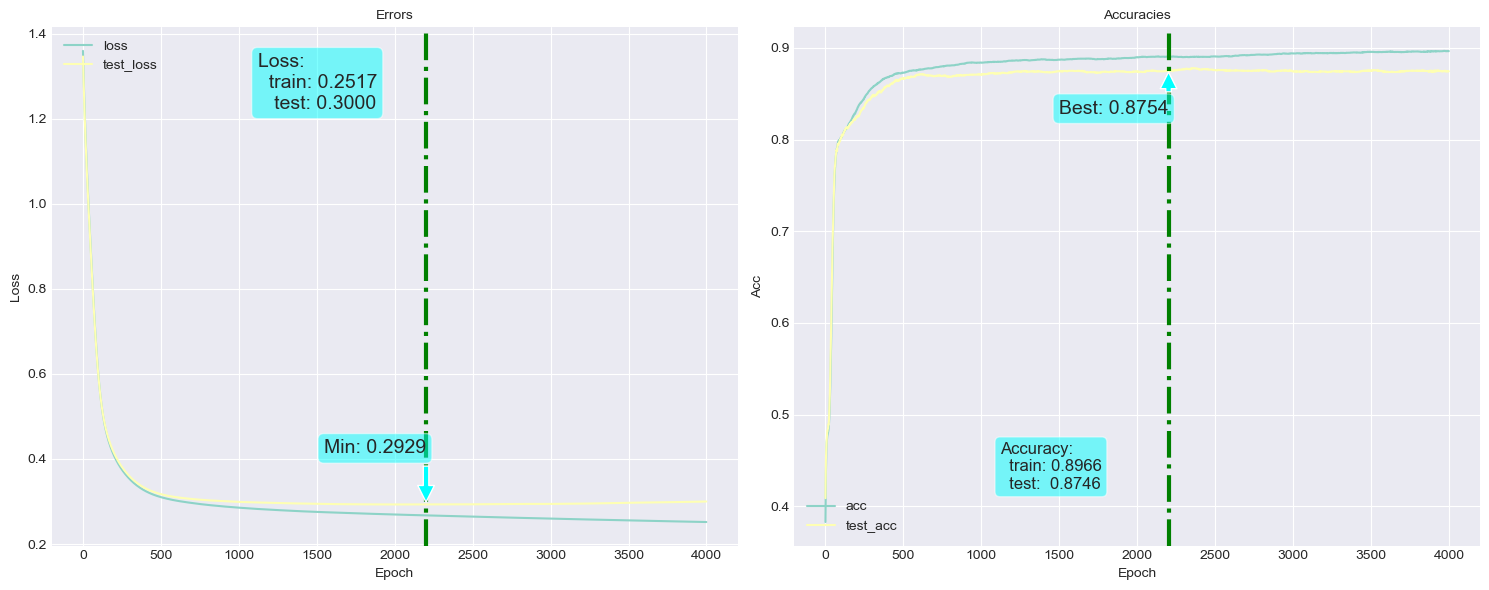

In [54]:
fn_plot_torch_hist(hist_df=loss_df)

In [55]:
## performance on train data

In [61]:
outputs = model(train_X)
outputs.shape

torch.Size([14336, 4])

In [62]:
y_pred = torch.argmax(outputs, dim=1).cpu().numpy() #outputs.cpu().detach().numpy()
y_pred

array([1, 2, 1, ..., 0, 0, 0], dtype=int64)

In [63]:
# print(classification_report(train_y.cpu().numpy(), y_pred))

In [64]:
y_true = train_y.cpu().numpy()
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       0.93      0.93      0.93      4634
           2       0.85      0.88      0.87      5402
           3       0.87      0.80      0.83      2700

    accuracy                           0.90     14336
   macro avg       0.91      0.90      0.91     14336
weighted avg       0.90      0.90      0.90     14336



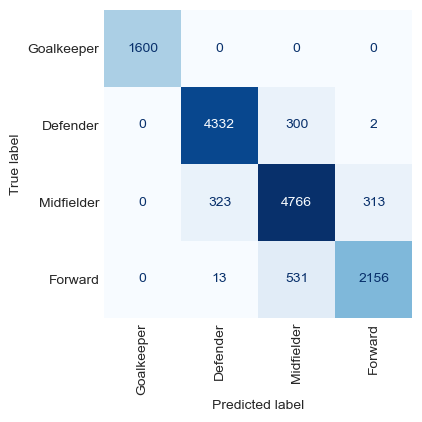

In [65]:
# Confusion Matrix

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels.values())

disp.plot(cmap= 'Blues', xticks_rotation = 'vertical', colorbar = False)
plt.grid(False)